In [1]:
using Distributed
addprocs(5)
@everywhere using DrWatson
@everywhere @quickactivate "Qwind"
using Qwind
include("../../scripts/plotting.jl")

      From worker 3:	  Activating environment at `~/code/Qwind.jl/Project.toml`
      From worker 6:	  Activating environment at `~/code/Qwind.jl/Project.toml`
      From worker 5:	  Activating environment at `~/code/Qwind.jl/Project.toml`
      From worker 2:	  Activating environment at `~/code/Qwind.jl/Project.toml`
      From worker 4:	  Activating environment at `~/code/Qwind.jl/Project.toml`


Main.QwindPlotting

In [3]:
model = Model("./config.yaml");
try
    rm(model.config[:integrator][:save_path], recursive=true)
catch
end
iterations_dict = Dict();
run!(model, iterations_dict);

┌ Info: Saving results to ./data
└ @ Qwind /home/arnau/code/Qwind.jl/src/model.jl:104
┌ Info: Iterating streamlines...
└ @ Qwind /home/arnau/code/Qwind.jl/src/model.jl:76
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: Integration of iteration 1 ended!
└ @ Qwind /home/arnau/code/Qwind.jl/src/model.jl:81
┌ Info: Saving results...
└ @ Qwind /home/arnau/code/Qwind.jl/src/model.jl:82
┌ Info: Done
└ @ Qwind /home/arnau/code/Qwind.jl/src/model.jl:85
┌ Info: Wind properties
└ @ Qwind /home/arnau/code/Qwind.jl/src/model.jl:87
┌ Info: Mass loss fraction 0.0
└ @ Qwind /home/arnau/code/Qwind.jl/src/model.jl:88
┌ Info: Updating radiative transfer... 
└ @ Qwind /home/arnau/code/Qwind.jl/src/radiative_transfer/regular_grid.jl:37
┌ Info: Constructing wind hull...
└ @ Qwind /home/arnau/code/Qwind.jl/src/radiative_transfer/density_interpolators/interpolation.jl:35
┌ Info: Trying wind hull with 6 sig digits...
└ @ Qwind /home/arnau/code/Qwind.jl/src/radiative_transfer/den

In [419]:
using PyPlot, ColorSchemes, Colors
include("../../scripts/plotting.jl")
include("./style.jl")

In [420]:
cmap = colorschemes[:deep]
cmap_pl = ColorMap("cmap", cmap.colors)

# Wind Hull

In [421]:
hull1 = iterations_dict[2]["radiative_transfer"].density_interpolator.hull
hull2 = iterations_dict[3]["radiative_transfer"].density_interpolator.hull
integ1 = iterations_dict[1]["integrators"]
integ2 = iterations_dict[2]["integrators"];

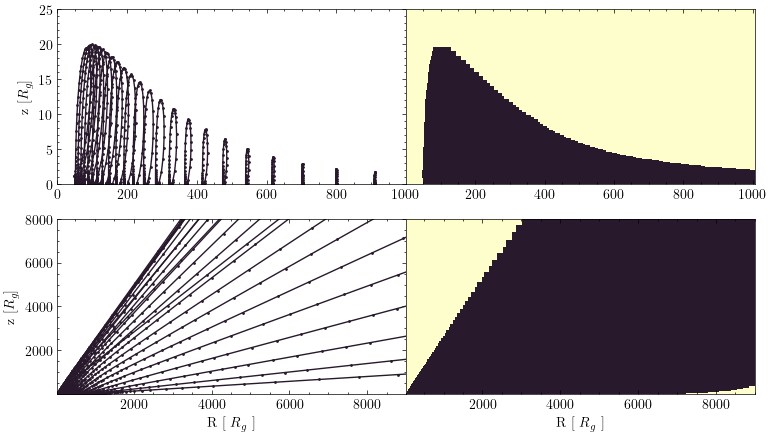

In [422]:
fig, ax = plt.subplots(2, 2, figsize=(9,5))

QwindPlotting.plot_streamlines(integ1[1:2:end], fig=fig, ax=ax[1,1], color = "#" * hex(convert(RGB, get(cmap, 1))))
QwindPlotting.plot_wind_hull(hull1, fig=fig, ax=ax[1,2], zmax=25, nr=500, nz=500, cmap=cmap_pl)

QwindPlotting.plot_streamlines(integ2[1:2:end], fig=fig, ax=ax[2,1], color = "#" * hex(convert(RGB, get(cmap, 1))))
QwindPlotting.plot_wind_hull(hull2, fig=fig, ax=ax[2,2], rmax=10000, zmax=10000, nr=500, nz=500, cmap=cmap_pl)

ax[1,1].set_xlim(0,1000)
ax[1,1].set_ylim(0,25)
ax[1,1].set_xlabel("")

ax[2,1].set_xlim(40, 9000)
ax[2,1].set_ylim(1e-6, 8000)
ax[2,2].set_xlim(40, 9000)
ax[2,2].set_ylim(1e-6, 8000)

ax[2,2].yaxis.set_ticks([])
ax[1,2].yaxis.set_ticks([])

ax[2,2].set_xlabel(L"R [ $R_g$ ]")
ax[2,1].set_xlabel(L"R [ $R_g$ ]")

plt.subplots_adjust(wspace=0)
fig.savefig("plots/wind_hull.pdf")

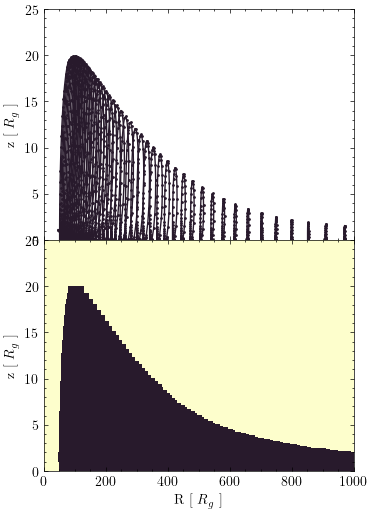

In [423]:
fig, ax = plt.subplots(2, 1, sharex=true, sharey=true, figsize=(4,6))

QwindPlotting.plot_streamlines(integ1[1:1:end], fig=fig, ax=ax[1], color = "#" * hex(convert(RGB, get(cmap, 1))))
QwindPlotting.plot_wind_hull(hull1, fig=fig, ax=ax[2], zmax=25, nr=500, nz=500, cmap=cmap_pl)

ax[1].set_xlim(0,1000)
ax[2].set_xlim(0,1000)

ax[1].set_ylim(0,25)
ax[2].set_ylim(0,25)

ax[2].set_xlabel(L"R [ $R_g$ ]")
ax[1].set_ylabel(L"z [ $R_g$ ]")
ax[2].set_ylabel(L"z [ $R_g$ ]")

plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig("plots/wind_hull.pdf")

# Density Interpolation Grid

In [424]:
grid1 = iterations_dict[2]["radiative_transfer"].density_interpolator.grid
grid2 = iterations_dict[6]["radiative_transfer"].density_interpolator.grid;

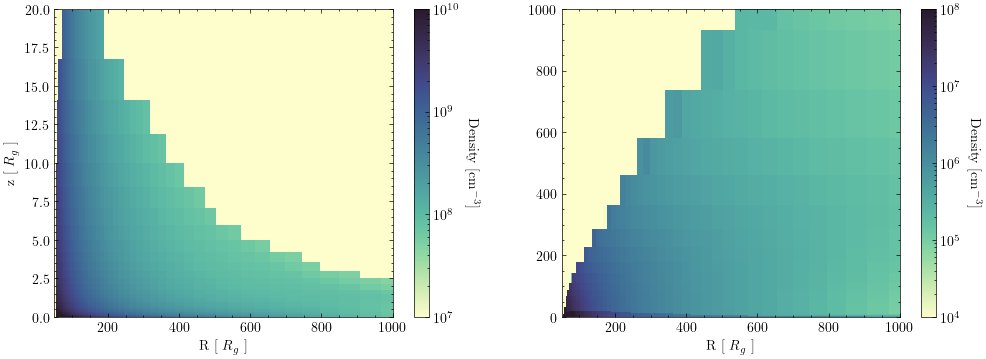

sys:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [425]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

QwindPlotting.plot_density_grid(grid1, fig=fig, ax=ax[1], cmap=cmap_pl, vmin=1e7, vmax=1e10)
QwindPlotting.plot_density_grid(grid2, fig=fig, ax=ax[2], cmap=cmap_pl, vmin=1e4, vmax=1e8)

#QwindPlotting.plot_streamlines(integ1[1:2:end], color="white", fig=fig, ax=ax[1], alpha = 0.1)

ax[1].set_xlabel(L"R [ $R_g$ ]")
ax[2].set_xlabel(L"R [ $R_g$ ]")

ax[1].set_ylabel(L"z [ $R_g$ ]")


ax[1].set_ylim(0, 20)
ax[1].set_xlim(50, 1000)


ax[2].set_xlim(50, 1000)
ax[2].set_ylim(0,1000)

plt.subplots_adjust()
fig.savefig("plots/density_grid.pdf")

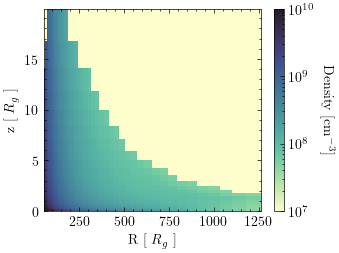

In [426]:
fig, ax = plt.subplots()

QwindPlotting.plot_density_grid(grid1, fig=fig, ax=ax, cmap=cmap_pl, vmin=1e7, vmax=1e10)

ax.set_xlabel(L"R [ $R_g$ ]")
ax.set_ylabel(L"z [ $R_g$ ]")

plt.subplots_adjust()
fig.savefig("plots/density_grid.pdf")

# X-Ray Grid

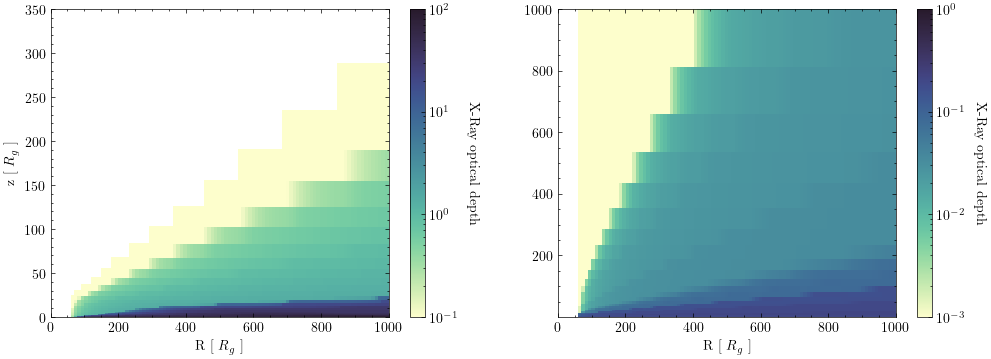

In [427]:
Rg = model.bh.Rg
xl = model.rad.xray_luminosity

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

QwindPlotting.plot_xray_grid(grid1, xl, Rg, fig=fig, ax=ax[1], cmap=cmap_pl, vmin=1e-1, vmax=1e2, ylim=(0, 350))
QwindPlotting.plot_xray_grid(grid2, xl, Rg, fig=fig, ax=ax[2], cmap=cmap_pl, vmin=1e-3, vmax=1)

ax[1].set_xlabel(L"R [ $R_g$ ]")
ax[2].set_xlabel(L"R [ $R_g$ ]")

ax[1].set_ylabel(L"z [ $R_g$ ]")


#ax[1].set_ylim(0, 20)
#ax[1].set_xlim(50, 1000)
#
#
#ax[2].set_xlim(50, 8000)
#ax[2].set_ylim(0,8000)
#
plt.subplots_adjust()
fig.savefig("plots/xray_tau_grid.pdf")

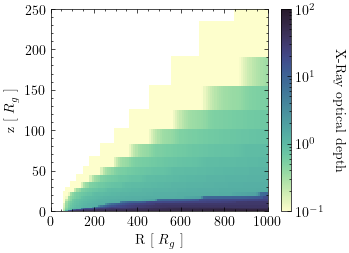

In [429]:
Rg = model.bh.Rg
xl = model.rad.xray_luminosity

fig, ax = plt.subplots()

QwindPlotting.plot_xray_grid(grid1, xl, Rg, fig=fig, ax=ax, cmap=cmap_pl, vmin=1e-1, vmax=1e2)

ax.set_xlabel(L"R [ $R_g$ ]")
ax.set_ylabel(L"z [ $R_g$ ]")

ax.set_ylim(0, 250)

plt.subplots_adjust()
fig.savefig("plots/xray_tau_grid.pdf")